In [344]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from function import *

In [345]:
df=pd.read_csv('titanic.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [346]:
"""
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation
***************************************************************
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
"""
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [348]:
df.shape

(891, 12)

In [349]:
#Age ve cabin sütununda null değerler var embarked da 2 tane null değer var 
""""
Cabin sütununda çok fazla null değer olduğundan makine öğrenmesi algoritmalarının iyi çalışabilmesi için onu daha sonra 
drop edeceğiz
Embarked da ise 2 tane null olduğu için göz ardı edebiliriz onlarıda drop edeceğiz
Age uygun bir şekilde doldurulacak
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [350]:
#PassengerId,Ticket ve Name ile işimiz yok 
df=df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [352]:
for i in df.columns:
    print(i,'için esşiz değerler :',pd.unique(df[i]))

Survived için esşiz değerler : [0 1]
Pclass için esşiz değerler : [3 1 2]
Sex için esşiz değerler : ['male' 'female']
Age için esşiz değerler : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp için esşiz değerler : [1 0 3 4 2 5 8]
Parch için esşiz değerler : [0 1 2 5 3 4 6]
Fare için esşiz değerler : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.

In [353]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


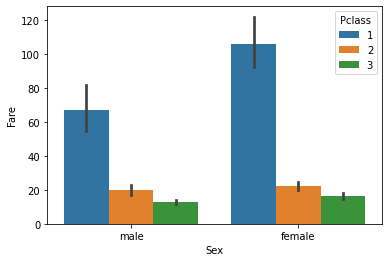

In [354]:
bar_plot(df,'Sex','Fare','Pclass')

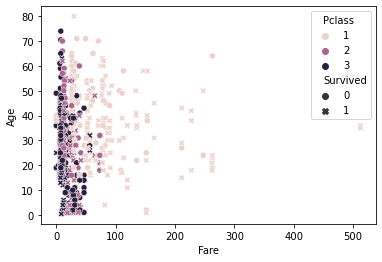

In [355]:
#Genel olarak genç insanlar ekonomik tarife seçmiş gibi duruyor
scatter_plot(df,'Fare','Age','Pclass','Survived')

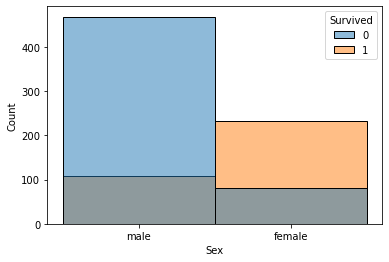

In [356]:
#Genel olarak erkeklerin sayısı daha fazla
hist(df,'Sex','Survived')

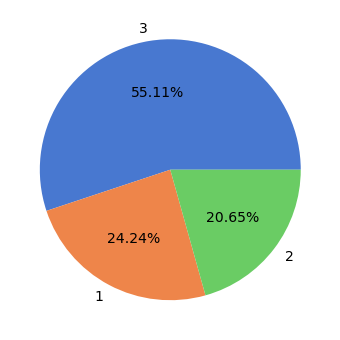

In [357]:
#En fazla 3. class yolcuları varmış
pie_chart(df,'Pclass')

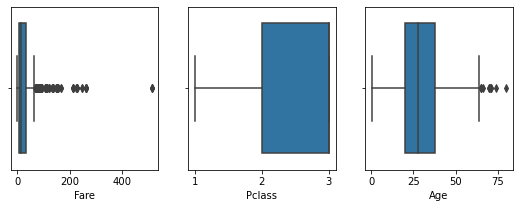

In [358]:
#Pclassın ağa doğru kayması Fare'de aykırı değerler oluşmasına neden olmuş
#Yolcular genel olarak 25 yaşlarındaymış.

plt.figure(figsize=(9,3))
plt.subplot(131)
boxplot(df,'Fare')
plt.subplot(132)
boxplot(df,'Pclass')
plt.subplot(133)
boxplot(df,'Age')
plt.show()


In [359]:
#687 tane null değer var bu yüzden drop edeceğim
df['Cabin'].isnull().sum()

687

In [360]:
df.drop(['Cabin'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.00,0,0,51.8625,S
7,0,3,male,2.00,3,1,21.0750,S
8,1,3,female,27.00,0,2,11.1333,S
9,1,2,female,14.00,1,0,30.0708,C


In [361]:
#Burayı en çok tekrar edenle dolduracağım
df['Embarked'].isnull().sum()

2

In [362]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [363]:
df['Embarked'].fillna(value='S',inplace=True)
df['Embarked'].isnull().sum()

0

In [364]:
#Yaşıda ortalama ile dolduralım
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df['Age'].isnull().sum()

0

In [365]:
df.duplicated(keep=False).sum()

160

In [366]:
#Tekrarlanan verilere bakalım
for i in df.columns:
    print(i,' :',df[i].duplicated(keep=False).sum())

Survived  : 891
Pclass  : 891
Sex  : 891
Age  : 875
SibSp  : 891
Parch  : 890
Fare  : 794
Cabin  : 790
Embarked  : 891


In [367]:
df=pd.get_dummies(df,columns=['Sex'])
df=pd.get_dummies(df,columns=['Pclass'])
df=pd.get_dummies(df,columns=['Embarked'])

In [368]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,NaN,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,NaN,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,C123,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,NaN,0,1,0,0,1,0,0,1


In [369]:
#Aykırı değer analizi
for i in ('Fare','Sex_female','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S'):
    print(i,'içinde aykırı değer var mı ?',outlier_detector(df,i,0.2,0.8))
    if outlier_detector(df,i,0.05,0.95):
        df=outlier_clear(df,i,0.05,0.95)

Fare içinde aykırı değer var mı ? True
Sex_female içinde aykırı değer var mı ? False
Sex_female içinde aykırı değer var mı ? False
Pclass_1 içinde aykırı değer var mı ? False
Pclass_2 içinde aykırı değer var mı ? False
Pclass_3 içinde aykırı değer var mı ? False
Embarked_C içinde aykırı değer var mı ? True
Embarked_Q içinde aykırı değer var mı ? True
Embarked_S içinde aykırı değer var mı ? False


In [370]:
df.shape

(888, 14)

In [371]:
"""
Makine öğrenmesi algoritmalarına geçmeden önce daha önce oluşturduğumuz kategorik değişkenlerin bazı sürunlarını düşürmek 
zorundayız.Çünkü kukla değişken tuzağına yakalanmak istemiyoruz.Örnek olarak kadın ve erkek sütunlarına bakarsak birbirleriyle
negatif bir ilişki içerisindeler iki sütunuda almak algoritmaya çıktısına zarar verecektir.
"""
df.corr()
  

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.071882,-0.033395,0.082157,0.261742,0.545899,-0.545899,0.280580,0.095834,-0.319093,0.160969,0.004981,-0.143763
Age,-0.071882,1.000000,-0.232092,-0.179336,0.093604,-0.084200,0.084200,0.319117,0.007342,-0.280052,0.029208,-0.013411,-0.017039
SibSp,-0.033395,-0.232092,1.000000,0.415141,0.211816,0.114799,-0.114799,-0.052043,-0.056796,0.090995,-0.056637,-0.026861,0.066452
Parch,0.082157,-0.179336,0.415141,1.000000,0.263910,0.247003,-0.247003,-0.017378,-0.000838,0.015608,-0.010733,-0.081351,0.060792
Fare,0.261742,0.093604,0.211816,0.263910,1.000000,0.222361,-0.222361,0.648950,-0.123234,-0.456876,0.245481,-0.129578,-0.132543
Sex_female,0.545899,-0.084200,0.114799,0.247003,0.222361,1.000000,-1.000000,0.098937,0.064812,-0.137804,0.083882,0.074207,-0.120176
Sex_male,-0.545899,0.084200,-0.114799,-0.247003,-0.222361,-1.000000,1.000000,-0.098937,-0.064812,0.137804,-0.083882,-0.074207,0.120176
Pclass_1,0.280580,0.319117,-0.052043,-0.017378,0.648950,0.098937,-0.098937,1.000000,-0.287184,-0.624717,0.287643,-0.154347,-0.153720
Pclass_2,0.095834,0.007342,-0.056796,-0.000838,-0.123234,0.064812,-0.064812,-0.287184,1.000000,-0.568549,-0.122790,-0.127908,0.188103
Pclass_3,-0.319093,-0.280052,0.090995,0.015608,-0.456876,-0.137804,0.137804,-0.624717,-0.568549,1.000000,-0.146939,0.236827,-0.021321


In [372]:
#Cabinde çok fazla null değer olduğu için onuda sileceğiz
#Eğer cabinde çok fazla değişken olmasaydı cabinlerin baş harflerini kullanarak yeni bir kategorik değişken oluşturup onu da 
#get_dummies ile olaya dahil edebilirdim.
df.drop(['Sex_female','Pclass_3','Embarked_S','Cabin'],axis=1,inplace=True)

In [373]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,1,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,1,0
2,1,26.0,0,0,7.9250,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,1,0,0,0,0


In [374]:
#Burdan sonrasına yeni bir dosyada devam edeceğim
df.to_csv("titanic_temizlenmiş.csv",index=False)
